In [2]:
import pandas as pd

Reading the data 

In [3]:
df = pd.read_csv('/kaggle/input/gowalla-checkins/Gowalla_totalCheckins.txt', sep='\t', header=None)
df.columns = ['userid','timestamp','latitude','longitude','spotid']
df.head()

,userid,timestamp,latitude,longitude,spotid
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


Explanation:

Geographical Bounding Box Definition:

The variables lon_min, lat_min, lon_max, and lat_max are assigned specific values, defining a geographical bounding box for New York City using longitude and latitude ranges.
DataFrame Filtering:

The variable nyc_events is created by filtering the original DataFrame (df) based on specific conditions. This filters events that fall within the defined geographical bounds of New York City.
Conditions include checks for longitude ('longitude') and latitude ('latitude') values to be within the specified minimum and maximum bounds.
Displaying Filtered Data:

The .head() method is applied to nyc_events to display the first few rows of the filtered DataFrame.
This provides a preview of events that satisfy the geographical constraints for New York City.

In [4]:
lon_min, lat_min, lon_max, lat_max = -74.2589, 40.4774, -73.7004, 40.9176
nyc_events = df[(df['longitude']>lon_min) & 
           (df['longitude']<lon_max) & 
           (df['latitude']>lat_min) & 
           (df['latitude']<lat_max)]
nyc_events.head()

,userid,timestamp,latitude,longitude,spotid
10,0,2010-10-12T00:21:28Z,40.643885,-73.782806,23261
11,0,2010-10-11T20:21:20Z,40.741374,-73.988105,16907
12,0,2010-10-11T20:20:42Z,40.741388,-73.989455,12973
13,0,2010-10-11T00:06:30Z,40.724910,-73.994621,341255
14,0,2010-10-10T22:00:37Z,40.729768,-73.998535,260957


In [5]:
venues = pd.read_csv('/kaggle/input/venues-in-new-york-city/spots.txt', sep='\t', header=0)
venues.head()

,spotid,spotname,geo-coordinates
0,1391604,Conference House Park,POINT(-74.2523431778 40.5017589436)
1,1391611,Almer G. Russell Pavilion,POINT(-74.2542636395 40.5022647413)
2,3612422,Conference House,POINT(-74.2490418254 40.5000644614)
3,3612431,Billop House,POINT(-74.2490418254 40.5000644614)
4,1391499,Biddle House,POINT(-74.2541456223 40.5054829933)


In [6]:
from datetime import datetime
import pytz

def parse_datetime(s):
    tzone = pytz.timezone("America/New_York")
    utc = datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ')
    return tzone.localize(utc)

# Apply the parse_datetime function to the 'timestamp' column
nyc_events['ts'] = nyc_events['timestamp'].apply(lambda x: parse_datetime(x))
nyc_events = nyc_events.drop('timestamp', axis=1, errors='ignore')

# Local date and time
nyc_events['date'] = nyc_events['ts'].dt.date
nyc_events['time'] = nyc_events['ts'].dt.time

# Day of the week (local time), day, and hour
nyc_events['weekday'] = nyc_events['ts'].dt.weekday
nyc_events['day'] = nyc_events['ts'].dt.day
nyc_events['hour'] = nyc_events['ts'].dt.hour

nyc_events[['ts', 'date', 'time', 'weekday', 'day', 'hour']].head()


/tmp/ipykernel_42/707514728.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_events['ts'] = nyc_events['timestamp'].apply(lambda x: parse_datetime(x))


,ts,date,time,weekday,day,hour
10,2010-10-12 00:21:28-04:00,2010-10-12,00:21:28,1,12,0
11,2010-10-11 20:21:20-04:00,2010-10-11,20:21:20,0,11,20
12,2010-10-11 20:20:42-04:00,2010-10-11,20:20:42,0,11,20
13,2010-10-11 00:06:30-04:00,2010-10-11,00:06:30,0,11,0
14,2010-10-10 22:00:37-04:00,2010-10-10,22:00:37,6,10,22


Parsing Timestamps:

The parse_datetime function is defined to convert timestamp strings to localized datetime objects using the New York timezone.
Applying Timestamp Parsing:

The parse_datetime function is applied to the 'timestamp' column, and the result is stored in a new column named 'ts'.
Dropping Original Timestamp Column:

The original 'timestamp' column is dropped from the DataFrame.
Extracting Date and Time Components:

New columns 'date' and 'time' are created to store the local date and time components extracted from the 'ts' column.
Extracting Day of the Week, Day, and Hour:

Additional columns 'weekday', 'day', and 'hour' are created to store the day of the week, day of the month, and hour of the day, respectively, extracted from the 'ts' column.
Displaying Subset of DataFrame:

The resulting DataFrame with the new columns related to date and time is displayed, showing the first few rows.

In [7]:
nyc_events = pd.DataFrame.merge(nyc_events, venues[['spotid','spotname']], on='spotid', how="inner")
nyc_events.head()

,userid,latitude,longitude,spotid,ts,date,time,weekday,day,hour,spotname
0,0,40.643885,-73.782806,23261,2010-10-12 00:21:28-04:00,2010-10-12,00:21:28,1,12,0,JFK John F. Kennedy International
1,0,40.643885,-73.782806,23261,2010-10-07 15:27:40-04:00,2010-10-07,15:27:40,3,7,15,JFK John F. Kennedy International
2,5,40.643885,-73.782806,23261,2010-08-16 03:47:20-04:00,2010-08-16,03:47:20,0,16,3,JFK John F. Kennedy International
3,8,40.643885,-73.782806,23261,2010-10-06 20:23:14-04:00,2010-10-06,20:23:14,2,6,20,JFK John F. Kennedy International
4,15,40.643885,-73.782806,23261,2010-10-13 04:10:36-04:00,2010-10-13,04:10:36,2,13,4,JFK John F. Kennedy International


In [74]:
#Bilstm with epochs 10

In [8]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Assuming nyc_events is your DataFrame with 'longitude' and 'latitude' columns
# Assuming nyc_events has a column 'userid' for user identification

# Rule of thumb for k: sqrt(n/2); here n is 112390 - total no. of NYC events
k_value = 240

# K-means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++')
X_sample = nyc_events[['longitude', 'latitude']]
kmeans.fit(X_sample)
y_kmeans = kmeans.labels_

# Use cluster assignments as input features for BiLSTM
X_bilstm = np.column_stack((X_sample, y_kmeans))  # Adding cluster assignments as a new feature

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bilstm, y_kmeans, test_size=0.2, random_state=42)

# Reshape X_train and X_test for BiLSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Record the start time
start_time = time.time()

# Train BiLSTM model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# Predict using the trained model
X_predict_bilstm = np.column_stack((nyc_events[['longitude', 'latitude']], y_kmeans))
X_predict_bilstm_reshaped = X_predict_bilstm.reshape((X_predict_bilstm.shape[0], 1, X_predict_bilstm.shape[1]))
nyc_events['cluster'] = model.predict(X_predict_bilstm_reshaped)

# Display a sample of the dataframe
print(nyc_events[['userid', 'latitude', 'longitude', 'spotid', 'cluster']].sample(100))

# Evaluate metrics
f1 = f1_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
accuracy = accuracy_score(y_test, np.round(model.predict(X_test_reshaped)))
precision = precision_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
recall = recall_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/10
2810/2810 [==============================] - 18s 5ms/step - loss: 5889.9272 - val_loss: 1357.5759
Epoch 2/10
2810/2810 [==============================] - 12s 4ms/step - loss: 456.5685 - val_loss: 77.4826
Epoch 3/10
2810/2810 [==============================] - 12s 4ms/step - loss: 24.9904 - val_loss: 4.6523
Epoch 4/10
2810/2810 [==============================] - 12s 4ms/step - loss: 1.1948 - val_loss: 0.2063
Epoch 5/10
2810/2810 [==============================] - 12s 4ms/step - loss: 0.1480 - val_loss: 0.1881
Epoch 6/10
2810/2810 [==============================] - 12s 4ms/step - loss: 0.1817 - val_loss: 0.0795
Epoch 7/10
2810/2810 [==============================] - 13s 5ms/step - loss: 0.1841 - val_loss: 0.0746
Epoch 8/10
2810/2810 [==============================] - 12s 4ms/step - loss: 0.1458 - val_loss: 0.0781
Epoch 9/10
2810/2810 [==============================] - 12s 4ms/step - loss: 0.1357 - val_loss: 0.1449
Epoch 10/10
2810/2810 [==============================] - 13s 5m

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


703/703 [==============================] - 2s 2ms/step
F1 Score: 0.934103257915131
Accuracy: 0.9382507340510722
Precision: 0.9323170115091302
Recall: 0.9382507340510722


In [72]:
gdf = nyc_events.groupby(['cluster', 'spotid']).size().reset_index()
gdf.columns = ['cluster', 'spotid', 'count']
idx = gdf.groupby(['cluster'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]

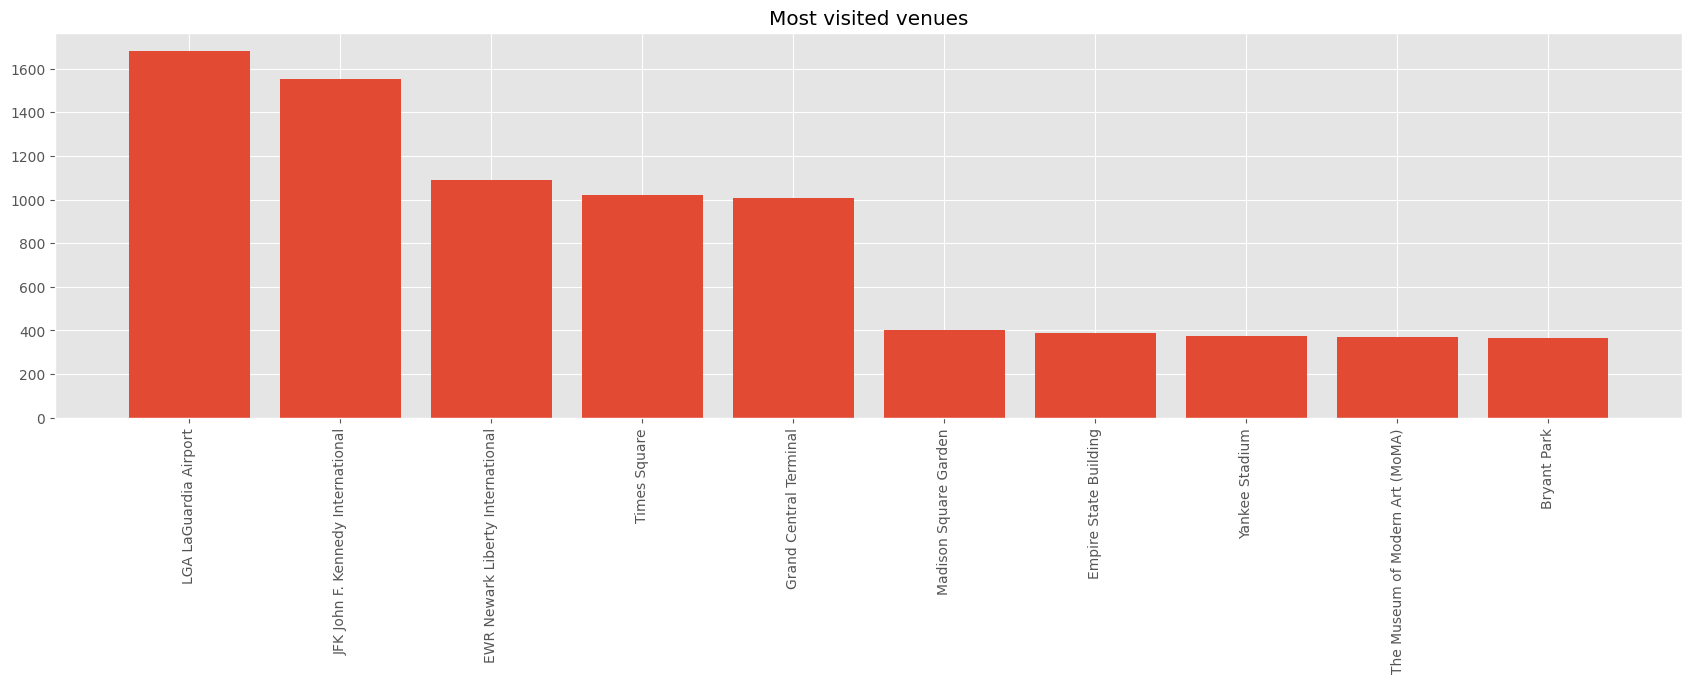

In [73]:
 #Most Visited Venues
plt.style.use('ggplot')
fig = plt.figure()
fig.set_size_inches(21,5)

plt.bar(range(len(topvenues)), topvenues['count'], align='center')
plt.xticks(range(len(topvenues)),topvenues['spotname'], rotation='vertical')
plt.title('Most visited venues')
plt.show()

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

def recommend_venues_bilstm(df, longitude, latitude, bilstm_model, kmeans_model, tolerance=1e-5):
    # Predict cluster using k-means model
    predicted_cluster = kmeans_model.predict(np.array([[longitude, latitude]]))[0]

    # Use the BiLSTM model to predict the cluster
    bilstm_input = np.array([[longitude, latitude, predicted_cluster]])
    bilstm_input = bilstm_input.reshape((bilstm_input.shape[0], 1, bilstm_input.shape[1]))

    # Predicted cluster using the BiLSTM model
    predicted_cluster_bilstm = bilstm_model.predict(bilstm_input)[0, 0]

    # Debugging information
    print(f"Predicted cluster (k-means): {predicted_cluster}")
    print(f"Predicted cluster (BILSTM): {predicted_cluster_bilstm}")
    print(f"Cluster labels in DataFrame: {df['cluster'].unique()}")

    # Ensure the predicted cluster is within the range of cluster labels in the DataFrame
    close_match = np.isclose(predicted_cluster_bilstm, df['cluster'], rtol=tolerance)
    if not close_match.any():
        return 'Predicted cluster not found in the DataFrame.'

    # Filter the DataFrame for the predicted cluster
    filtered_df = df[close_match]

    # Check if there are records in the filtered DataFrame
    if not filtered_df.empty:
        # Fetch the venue name of the topmost record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['spotname']
        # Construct the recommendation message
        msg = 'What about visiting the ' + venue_name + '?'
    else:
        msg = 'No venue recommendation available for the predicted cluster.'

    return msg


In [10]:
# Example usage
recommendation_bilstm = recommend_venues_bilstm(topvenues_df,-74.164517,40.734234, model, kmeans)
print(recommendation_bilstm)

1/1 [==============================] - 0s 28ms/step
Predicted cluster (k-means): 171
Predicted cluster (BILSTM): 170.64393615722656
Cluster labels in DataFrame: [  9.984453 120.84135   59.872013 ...  88.98585   89.99916  235.56477 ]
What about visiting the Newark Penn Station?


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


703/703 [==============================] - 1s 2ms/step - loss: 0.1045
Test Loss: 0.10448478162288666


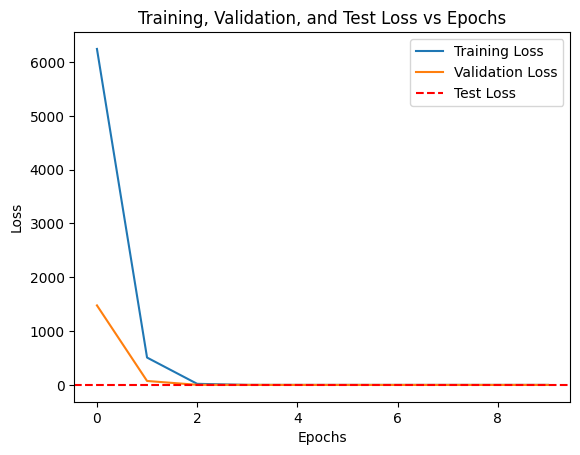

In [11]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_reshaped, y_test)

# Print the test loss
print(f'Test Loss: {test_loss}')

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Plot the test loss as a horizontal line
plt.title('Training, Validation, and Test Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


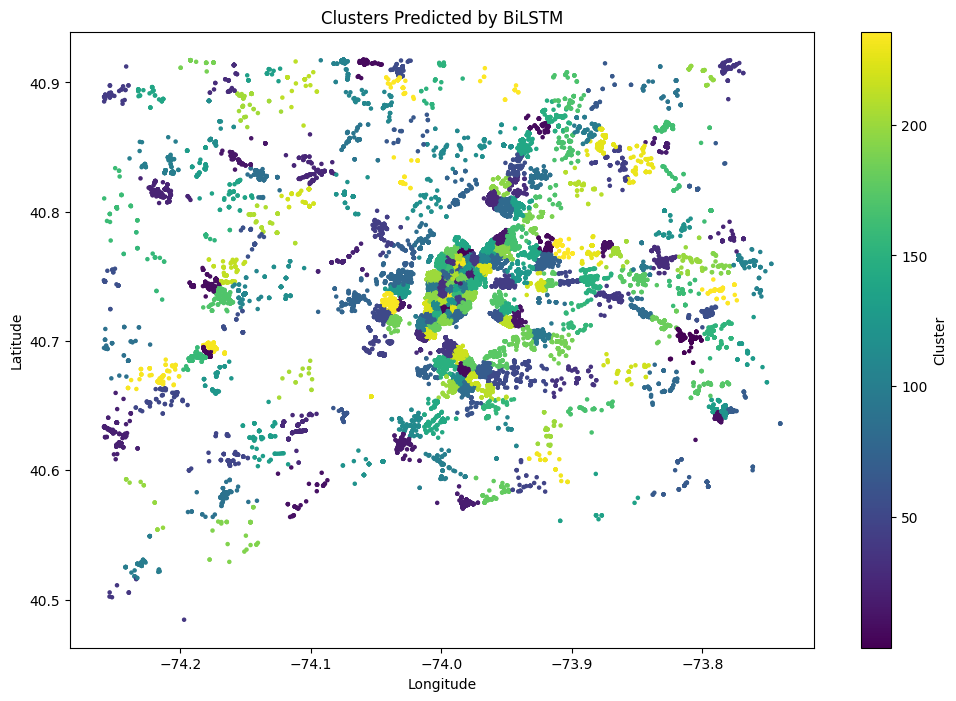

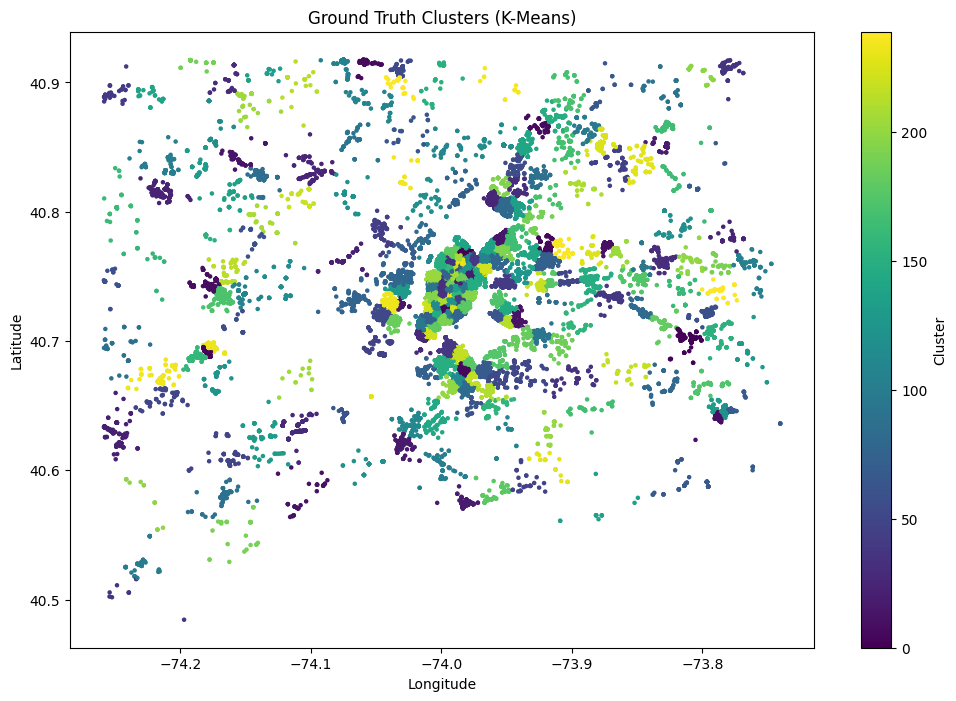

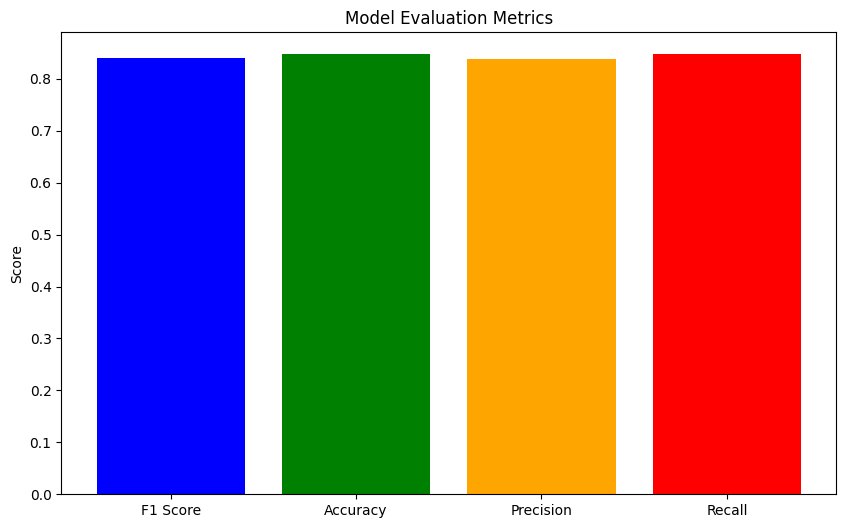

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense


# Visualization of Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=nyc_events['cluster'], cmap='viridis', s=5)
plt.title('Clusters Predicted by BiLSTM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Visualization of Ground Truth Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=y_kmeans, cmap='viridis', s=5)
plt.title('Ground Truth Clusters (K-Means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Plot Evaluation Metrics
metrics = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [f1, accuracy, precision, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()



In [ ]:
#bilstm with 50 epochs

In [13]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

k_value = 240

# K-means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++')
X_sample = nyc_events[['longitude', 'latitude']]
kmeans.fit(X_sample)
y_kmeans = kmeans.labels_

# Use cluster assignments as input features for BiLSTM
X_bilstm = np.column_stack((X_sample, y_kmeans))  # Adding cluster assignments as a new feature

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bilstm, y_kmeans, test_size=0.2, random_state=42)

# Reshape X_train and X_test for BiLSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define BiLSTM model
model_bilstm_50 = Sequential()
model_bilstm_50.add(Bidirectional(LSTM(50), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_bilstm_50.add(Dense(1, activation='linear'))
model_bilstm_50.compile(optimizer='adam', loss='mean_squared_error')

# Record the start time
start_time = time.time()

# Train BiLSTM model
history = model_bilstm_50.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# Predict using the trained model
X_predict_bilstm = np.column_stack((nyc_events[['longitude', 'latitude']], y_kmeans))
X_predict_bilstm_reshaped = X_predict_bilstm.reshape((X_predict_bilstm.shape[0], 1, X_predict_bilstm.shape[1]))
nyc_events['cluster'] = model_bilstm_50.predict(X_predict_bilstm_reshaped)

# Display a sample of the dataframe
print(nyc_events[['userid', 'latitude', 'longitude', 'spotid', 'cluster']].sample(100))

# Evaluate metrics
f1 = f1_score(y_test, np.round(model_bilstm_50.predict(X_test_reshaped)), average='weighted')
accuracy = accuracy_score(y_test, np.round(model_bilstm_50.predict(X_test_reshaped)))
precision = precision_score(y_test, np.round(model_bilstm_50.predict(X_test_reshaped)), average='weighted')
recall = recall_score(y_test, np.round(model_bilstm_50.predict(X_test_reshaped)), average='weighted')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/50
2810/2810 [==============================] - 16s 4ms/step - loss: 6802.9033 - val_loss: 1749.7350
Epoch 2/50
2810/2810 [==============================] - 11s 4ms/step - loss: 628.5746 - val_loss: 103.4729
Epoch 3/50
2810/2810 [==============================] - 11s 4ms/step - loss: 29.5158 - val_loss: 4.1149
Epoch 4/50
2810/2810 [==============================] - 11s 4ms/step - loss: 1.2087 - val_loss: 0.2702
Epoch 5/50
2810/2810 [==============================] - 11s 4ms/step - loss: 0.1934 - val_loss: 0.0857
Epoch 6/50
2810/2810 [==============================] - 12s 4ms/step - loss: 0.1927 - val_loss: 0.2138
Epoch 7/50
2810/2810 [==============================] - 12s 4ms/step - loss: 0.2164 - val_loss: 0.2247
Epoch 8/50
2810/2810 [==============================] - 12s 4ms/step - loss: 0.1756 - val_loss: 0.0379
Epoch 9/50
2810/2810 [==============================] - 13s 5ms/step - loss: 0.1919 - val_loss: 0.2298
Epoch 10/50
2810/2810 [==============================] - 15s 5

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


703/703 [==============================] - 1s 2ms/step
F1 Score: 0.934746304690965
Accuracy: 0.9389180532075807
Precision: 0.9327311344569026
Recall: 0.9389180532075807


In [14]:
gdf = nyc_events.groupby(['cluster', 'spotid']).size().reset_index()
gdf.columns = ['cluster', 'spotid', 'count']
idx = gdf.groupby(['cluster'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

def recommend_venues_bilstm(df, longitude, latitude, bilstm_model, kmeans_model, tolerance=1e-5):
    # Predict cluster using k-means model
    predicted_cluster = kmeans_model.predict(np.array([[longitude, latitude]]))[0]

    # Use the BiLSTM model to predict the cluster
    bilstm_input = np.array([[longitude, latitude, predicted_cluster]])
    bilstm_input = bilstm_input.reshape((bilstm_input.shape[0], 1, bilstm_input.shape[1]))

    # Predicted cluster using the BiLSTM model
    predicted_cluster_bilstm = bilstm_model.predict(bilstm_input)[0, 0]

    # Debugging information
    print(f"Predicted cluster (k-means): {predicted_cluster}")
    print(f"Predicted cluster (BILSTM): {predicted_cluster_bilstm}")
    print(f"Cluster labels in DataFrame: {df['cluster'].unique()}")

    # Ensure the predicted cluster is within the range of cluster labels in the DataFrame
    close_match = np.isclose(predicted_cluster_bilstm, df['cluster'], rtol=tolerance)
    if not close_match.any():
        return 'Predicted cluster not found in the DataFrame.'

    # Filter the DataFrame for the predicted cluster
    filtered_df = df[close_match]

    # Check if there are records in the filtered DataFrame
    if not filtered_df.empty:
        # Fetch the venue name of the topmost record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['spotname']
        # Construct the recommendation message
        msg = 'What about visiting the ' + venue_name + '?'
    else:
        msg = 'No venue recommendation available for the predicted cluster.'

    return msg


In [16]:
# Example usage
recommendation_bilstm = recommend_venues_bilstm(topvenues_df,-74.164517,40.734234, model_bilstm_50, kmeans)
print(recommendation_bilstm)

1/1 [==============================] - 0s 25ms/step
Predicted cluster (k-means): 143
Predicted cluster (BILSTM): 142.9447021484375
Cluster labels in DataFrame: [-2.0078182e-02  3.1232274e+00  1.2891322e+02 ...  1.8288638e+02
  1.8288591e+02 -2.0744324e-02]
What about visiting the Newark Penn Station?


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


703/703 [==============================] - 2s 2ms/step - loss: 0.0844
Test Loss: 0.084361232817173


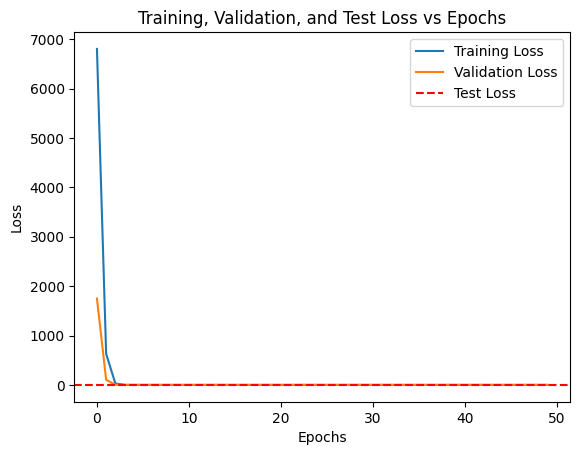

In [17]:
# Evaluate the model on the test set
test_loss = model_bilstm_50.evaluate(X_test_reshaped, y_test)

# Print the test loss
print(f'Test Loss: {test_loss}')

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Plot the test loss as a horizontal line
plt.title('Training, Validation, and Test Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


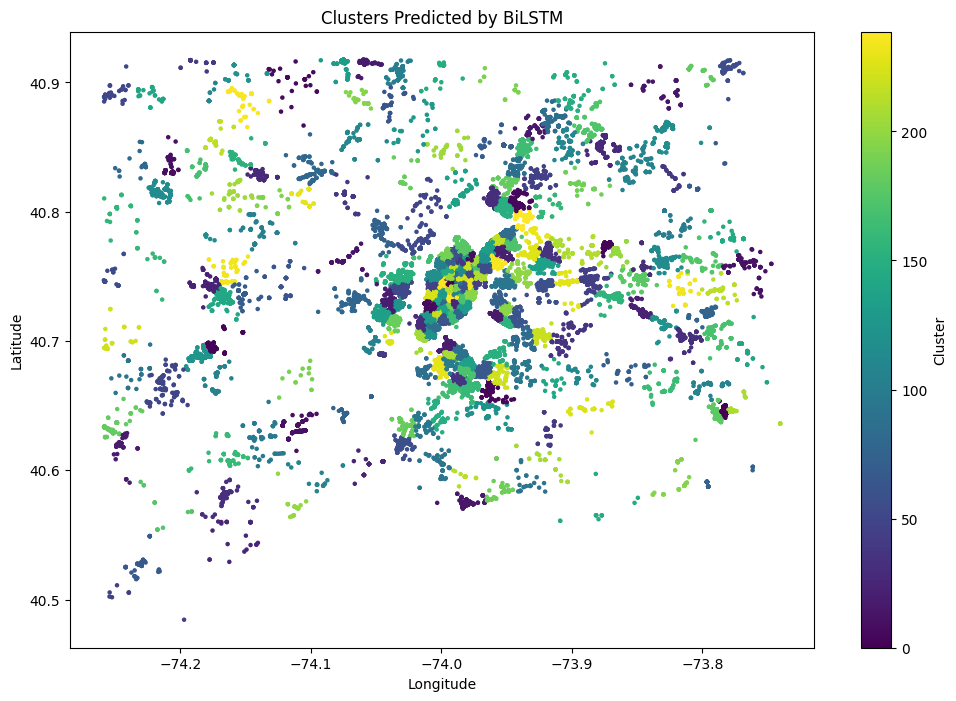

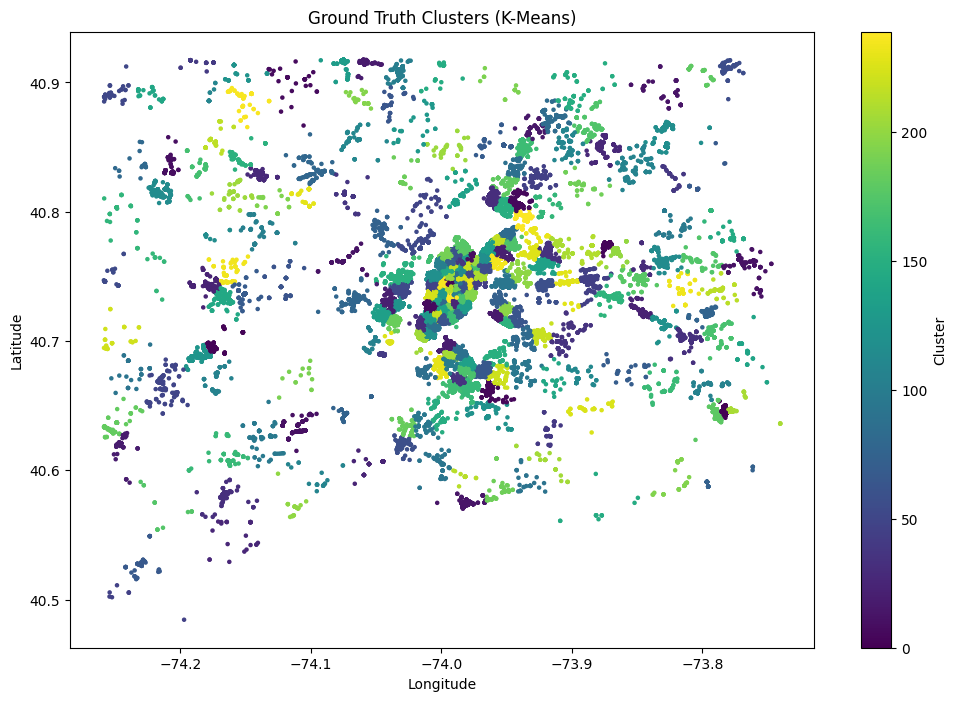

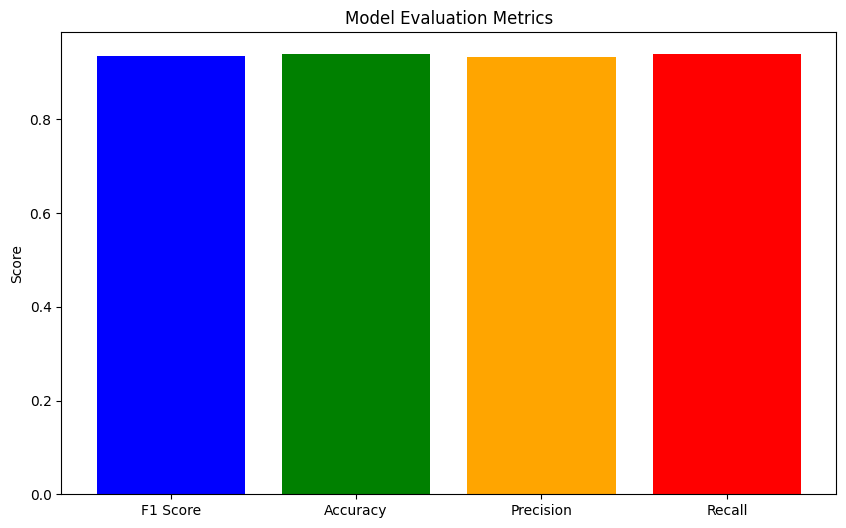

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# ... (Your existing code)

# Visualization of Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=nyc_events['cluster'], cmap='viridis', s=5)
plt.title('Clusters Predicted by BiLSTM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Visualization of Ground Truth Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=y_kmeans, cmap='viridis', s=5)
plt.title('Ground Truth Clusters (K-Means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Plot Evaluation Metrics
metrics = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [f1, accuracy, precision, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()



bilstm with 100 epochs

In [19]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Assuming nyc_events is your DataFrame with 'longitude' and 'latitude' columns
# Assuming nyc_events has a column 'userid' for user identification

# Rule of thumb for k: sqrt(n/2); here n is 112390 - total no. of NYC events
k_value = 240

# K-means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++')
X_sample = nyc_events[['longitude', 'latitude']]
kmeans.fit(X_sample)
y_kmeans = kmeans.labels_

# Use cluster assignments as input features for BiLSTM
X_bilstm = np.column_stack((X_sample, y_kmeans))  # Adding cluster assignments as a new feature

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bilstm, y_kmeans, test_size=0.2, random_state=42)

# Reshape X_train and X_test for BiLSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Record the start time
start_time = time.time()

# Train BiLSTM model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# Predict using the trained model
X_predict_bilstm = np.column_stack((nyc_events[['longitude', 'latitude']], y_kmeans))
X_predict_bilstm_reshaped = X_predict_bilstm.reshape((X_predict_bilstm.shape[0], 1, X_predict_bilstm.shape[1]))
nyc_events['cluster'] = model.predict(X_predict_bilstm_reshaped)

# Display a sample of the dataframe
print(nyc_events[['userid', 'latitude', 'longitude', 'spotid', 'cluster']].sample(100))

# Evaluate metrics
f1 = f1_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
accuracy = accuracy_score(y_test, np.round(model.predict(X_test_reshaped)))
precision = precision_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
recall = recall_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/100
2810/2810 [==============================] - 17s 4ms/step - loss: 6490.4849 - val_loss: 1530.6803
Epoch 2/100
2810/2810 [==============================] - 11s 4ms/step - loss: 560.5962 - val_loss: 95.3442
Epoch 3/100
2810/2810 [==============================] - 11s 4ms/step - loss: 26.1490 - val_loss: 2.1376
Epoch 4/100
2810/2810 [==============================] - 11s 4ms/step - loss: 0.6533 - val_loss: 0.1251
Epoch 5/100
2810/2810 [==============================] - 10s 3ms/step - loss: 0.1986 - val_loss: 0.0572
Epoch 6/100
2810/2810 [==============================] - 10s 4ms/step - loss: 0.1462 - val_loss: 0.2840
Epoch 7/100
2810/2810 [==============================] - 10s 4ms/step - loss: 0.1571 - val_loss: 1.0212
Epoch 8/100
2810/2810 [==============================] - 10s 4ms/step - loss: 0.1695 - val_loss: 0.0535
Epoch 9/100
2810/2810 [==============================] - 10s 4ms/step - loss: 0.1779 - val_loss: 0.1401
Epoch 10/100
2810/2810 [==============================

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


703/703 [==============================] - 2s 3ms/step
F1 Score: 0.9136226239970342
Accuracy: 0.9187205267372542
Precision: 0.9140288018481033
Recall: 0.9187205267372542


In [20]:
gdf = nyc_events.groupby(['cluster', 'spotid']).size().reset_index()
gdf.columns = ['cluster', 'spotid', 'count']
idx = gdf.groupby(['cluster'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

def recommend_venues_bilstm(df, longitude, latitude, bilstm_model, kmeans_model, tolerance=1e-5):
    # Predict cluster using k-means model
    predicted_cluster = kmeans_model.predict(np.array([[longitude, latitude]]))[0]

    # Use the BiLSTM model to predict the cluster
    bilstm_input = np.array([[longitude, latitude, predicted_cluster]])
    bilstm_input = bilstm_input.reshape((bilstm_input.shape[0], 1, bilstm_input.shape[1]))

    # Predicted cluster using the BiLSTM model
    predicted_cluster_bilstm = bilstm_model.predict(bilstm_input)[0, 0]

    # Debugging information
    print(f"Predicted cluster (k-means): {predicted_cluster}")
    print(f"Predicted cluster (BILSTM): {predicted_cluster_bilstm}")
    print(f"Cluster labels in DataFrame: {df['cluster'].unique()}")

    # Ensure the predicted cluster is within the range of cluster labels in the DataFrame
    close_match = np.isclose(predicted_cluster_bilstm, df['cluster'], rtol=tolerance)
    if not close_match.any():
        return 'Predicted cluster not found in the DataFrame.'

    # Filter the DataFrame for the predicted cluster
    filtered_df = df[close_match]

    # Check if there are records in the filtered DataFrame
    if not filtered_df.empty:
        # Fetch the venue name of the topmost record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['spotname']
        # Construct the recommendation message
        msg = 'What about visiting the ' + venue_name + '?'
    else:
        msg = 'No venue recommendation available for the predicted cluster.'

    return msg


In [22]:
# Example usage
recommendation_bilstm = recommend_venues_bilstm(topvenues_df,-74.164517,40.734234, model, kmeans)
print(recommendation_bilstm)

1/1 [==============================] - 0s 30ms/step
Predicted cluster (k-means): 89
Predicted cluster (BILSTM): 88.41010284423828
Cluster labels in DataFrame: [  3.9349973 101.06672   179.93147   ...  89.46918   182.00002
 238.45512  ]
What about visiting the Newark Penn Station?


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


703/703 [==============================] - 2s 3ms/step - loss: 0.0623
Test Loss: 0.06234501302242279


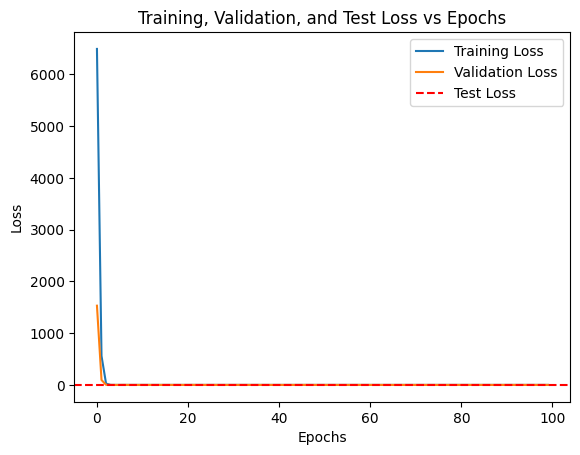

In [23]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_reshaped, y_test)

# Print the test loss
print(f'Test Loss: {test_loss}')

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Plot the test loss as a horizontal line
plt.title('Training, Validation, and Test Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


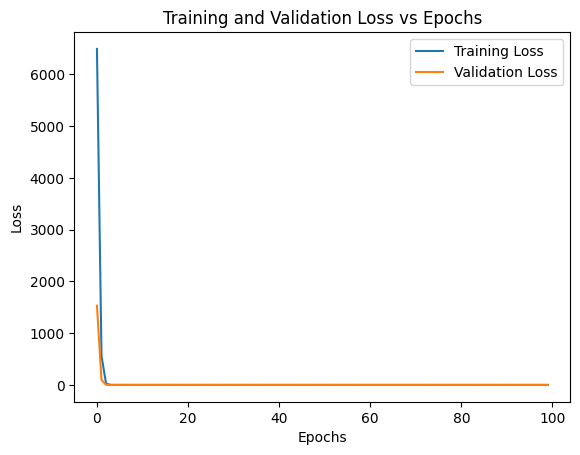

In [24]:
import matplotlib.pyplot as plt

# Assuming you already have the 'history' object from model training

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
# Add title and labels
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Add legend
plt.legend()
# Show the plot
plt.show()


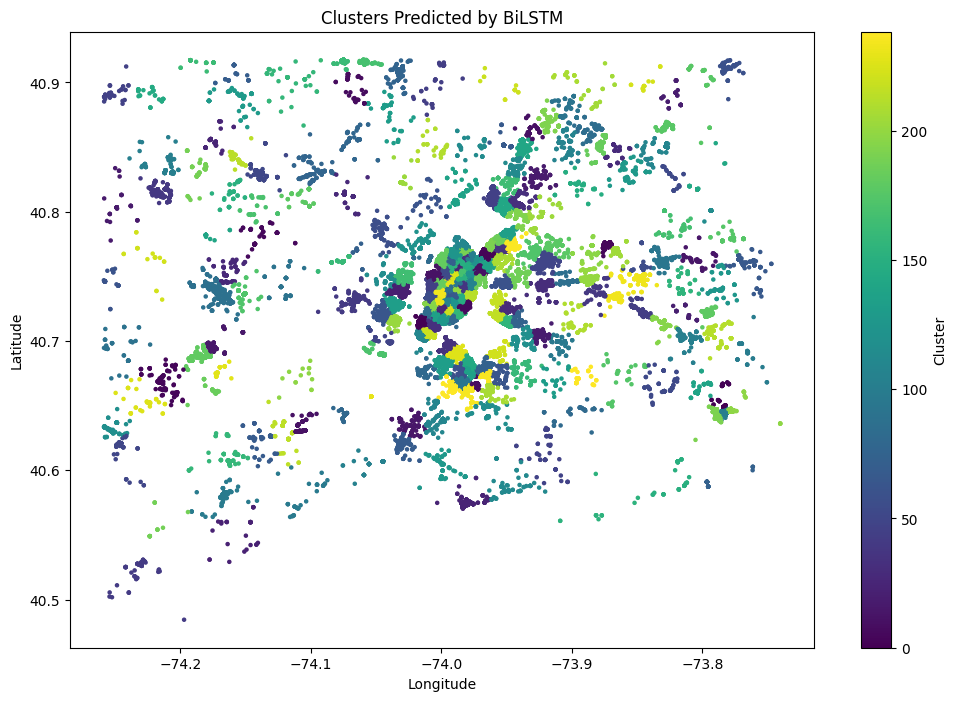

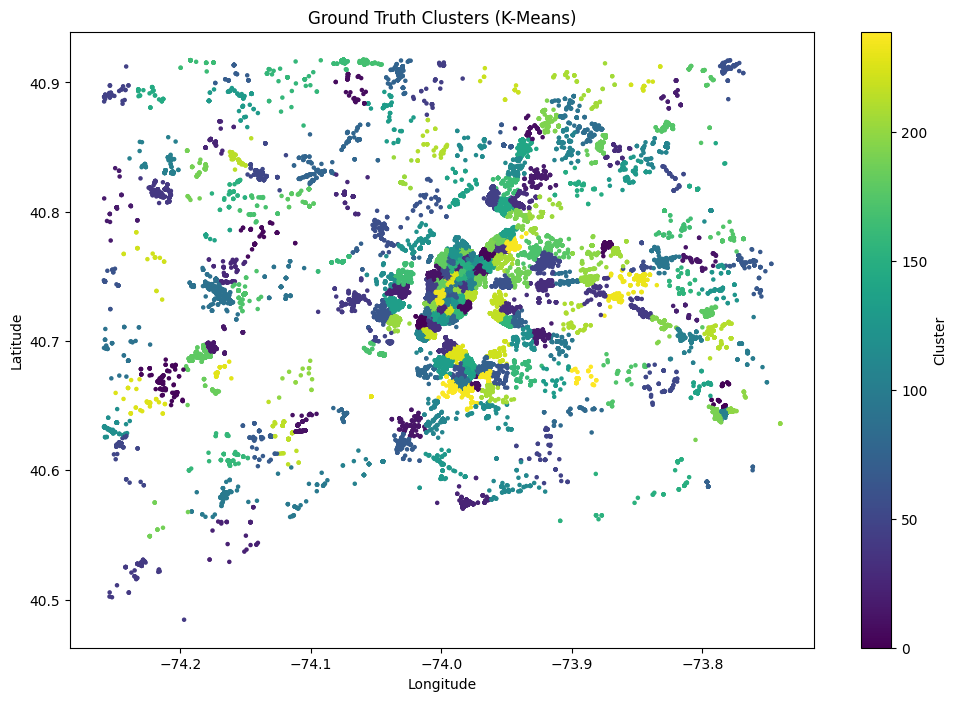

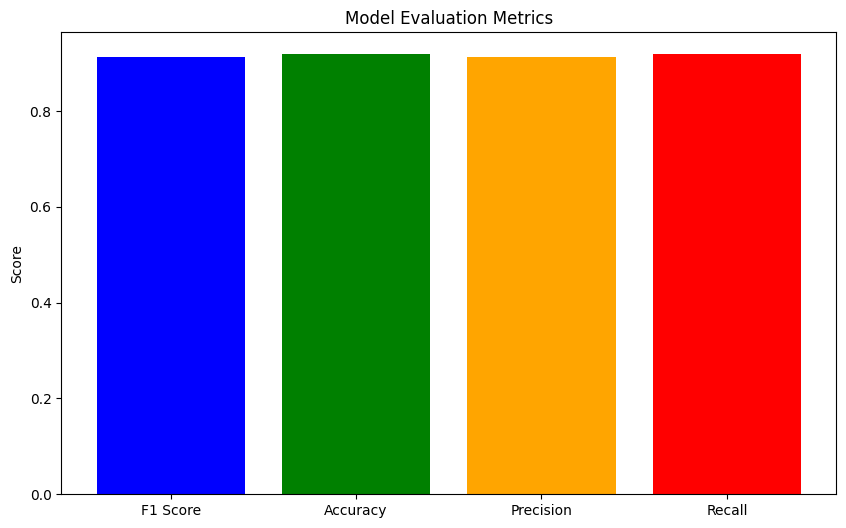

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# ... (Your existing code)

# Visualization of Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=nyc_events['cluster'], cmap='viridis', s=5)
plt.title('Clusters Predicted by BiLSTM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Visualization of Ground Truth Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=y_kmeans, cmap='viridis', s=5)
plt.title('Ground Truth Clusters (K-Means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Plot Evaluation Metrics
metrics = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [f1, accuracy, precision, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 240, silhouette_score: 0.4639049924967029
Epoch 1/10
2459/2459 [==============================] - 18s 6ms/step - loss: 7591.2993 - val_loss: 3214.8376
Epoch 2/10
2459/2459 [==============================] - 13s 5ms/step - loss: 1535.9238 - val_loss: 565.7334
Epoch 3/10
2459/2459 [==============================] - 13s 5ms/step - loss: 218.8751 - val_loss: 48.2412
Epoch 4/10
2459/2459 [==============================] - 13s 5ms/step - loss: 13.9876 - val_loss: 1.8551
Epoch 5/10
2459/2459 [==============================] - 12s 5ms/step - loss: 0.6610 - val_loss: 0.1865
Epoch 6/10
2459/2459 [==============================] - 12s 5ms/step - loss: 0.1321 - val_loss: 0.0520
Epoch 7/10
2459/2459 [==============================] - 11s 4ms/step - loss: 0.0855 - val_loss: 0.0128
Epoch 8/10
2459/2459 [==============================] - 11s 4ms/step - loss: 0.0760 - val_loss: 0.1290
Epoch 9/10
2459/2459 [==============================] - 11s 4ms/step - loss: 0.0716 - val_loss: 0.1959
Epoch 10/10


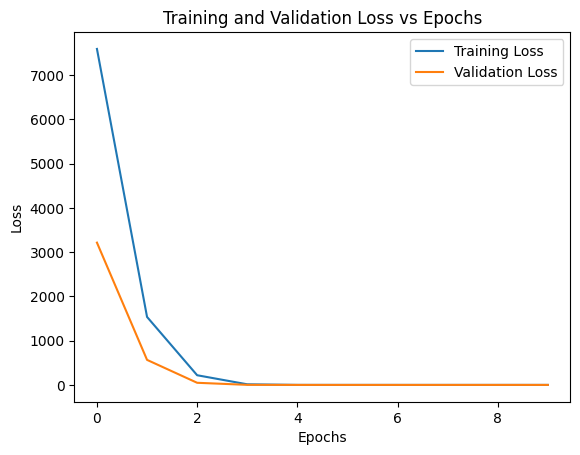

3513/3513 [==============================] - 7s 2ms/step
        userid   latitude  longitude  spotid     cluster
70510   179545  40.679251 -73.968018  994029  217.941910
82267    49383  40.739811 -73.982006  173438  160.691559
90817   105307  40.732982 -74.003299  167165  148.430206
21366     3372  40.723305 -73.988317  249339  131.882858
94289    15594  40.663417 -73.961153  632774  164.408325
...        ...        ...        ...     ...         ...
102006   36273  40.711283 -74.015843  159433  201.991486
38755    51637  40.813582 -74.074438  990606  102.912605
1106     35544  40.643885 -73.782806   23261    1.992144
33031    25654  40.807313 -73.962514   37749  141.154251
23952    28423  40.730258 -73.983895   58108  153.719604

[100 rows x 5 columns]
 56/527 [==>...........................] - ETA: 0s

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


527/527 [==============================] - 1s 2ms/step
F1 Score: 0.9375219852905703
Accuracy: 0.938133934397058
Precision: 0.9371263510857599
Recall: 0.938133934397058


In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming nyc_events is your DataFrame with 'longitude' and 'latitude' columns

# Rule of thumb for k: sqrt(n/2); here n is 112390 - total no. of NYC events
k_value = 240

# K-means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++')
X_sample = nyc_events[['longitude', 'latitude']]
kmeans.fit(X_sample)
y = kmeans.labels_

# Print silhouette score
silhouette = silhouette_score(X_sample, y, metric='euclidean')
print(f"k = {k_value}, silhouette_score: {silhouette}")

# Use cluster assignments as input features for LSTM
X_lstm = np.column_stack((X_sample, y))  # Adding cluster assignments as a new feature

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_lstm, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape X_train, X_val, and X_test for LSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Record the start time
start_time = time.time()



# Train LSTM model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Train LSTM model
#model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))
# Predict using the trained model
X_predict_lstm = np.column_stack((nyc_events[['longitude', 'latitude']], y))
X_predict_lstm_reshaped = X_predict_lstm.reshape((X_predict_lstm.shape[0], X_predict_lstm.shape[1], 1))
nyc_events['cluster'] = model.predict(X_predict_lstm_reshaped)

# Display a sample of the dataframe
print(nyc_events[['userid', 'latitude', 'longitude', 'spotid', 'cluster']].sample(100))


# Evaluate metrics
f1 = f1_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
accuracy = accuracy_score(y_test, np.round(model.predict(X_test_reshaped)))
precision = precision_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
recall = recall_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



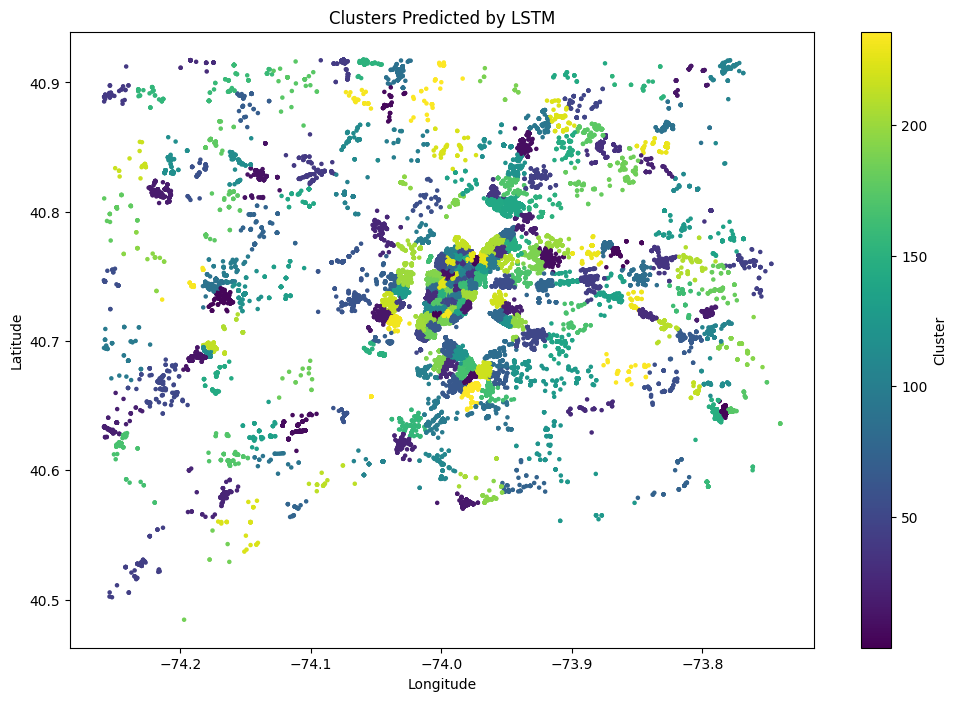

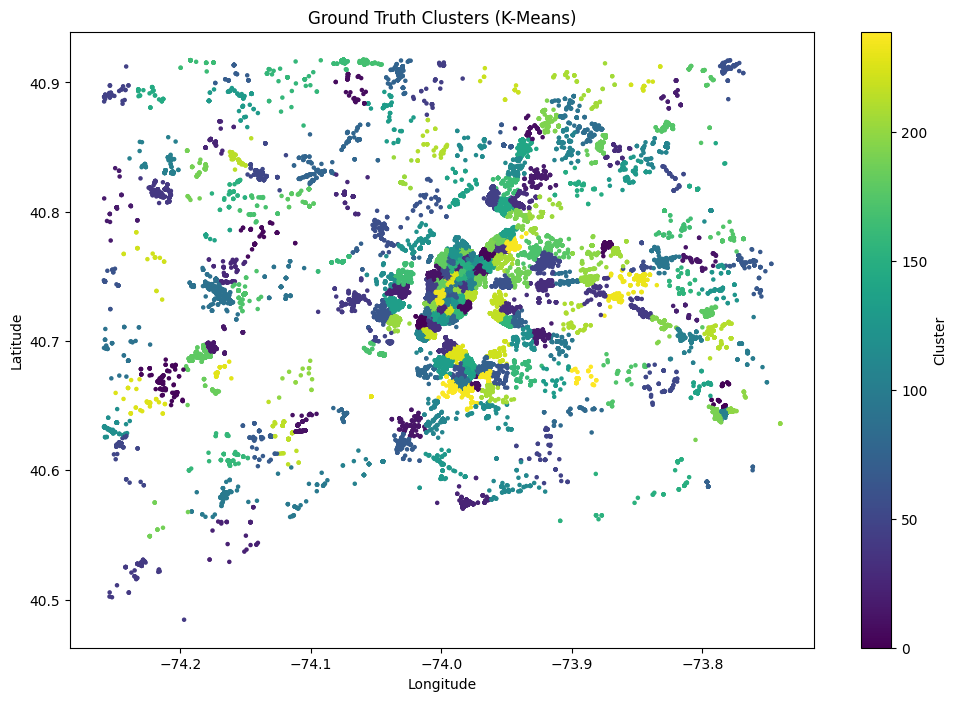

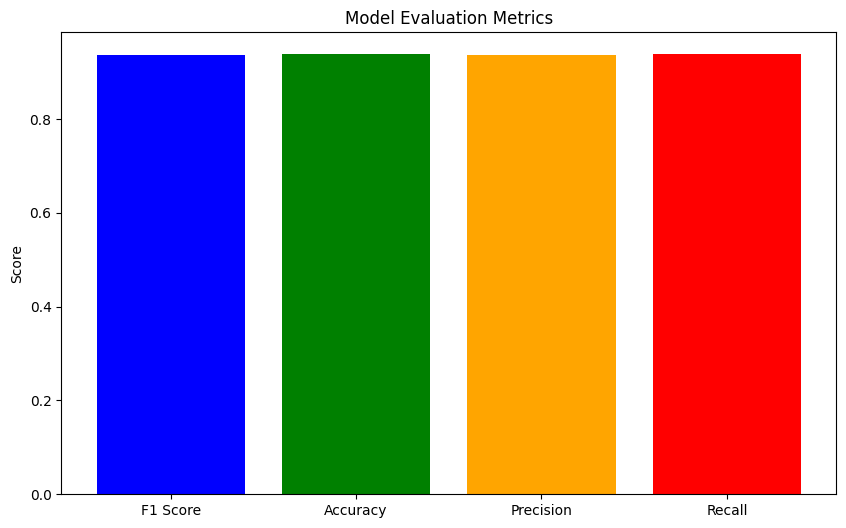

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# ... (Your existing code)

# Visualization of Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=nyc_events['cluster'], cmap='viridis', s=5)
plt.title('Clusters Predicted by LSTM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Visualization of Ground Truth Clusters
plt.figure(figsize=(12, 8))
plt.scatter(nyc_events['longitude'], nyc_events['latitude'], c=y_kmeans, cmap='viridis', s=5)
plt.title('Ground Truth Clusters (K-Means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Plot Evaluation Metrics
metrics = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [f1, accuracy, precision, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()



527/527 [==============================] - 1s 2ms/step - loss: 0.0698
Test Loss: 0.06979849934577942


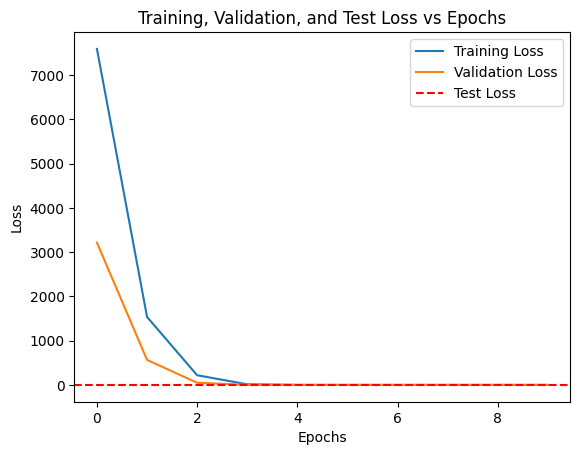

In [30]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_reshaped, y_test)

# Print the test loss
print(f'Test Loss: {test_loss}')

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Plot the test loss as a horizontal line
plt.title('Training, Validation, and Test Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
gdf = nyc_events.groupby(['cluster', 'spotid']).size().reset_index()
gdf.columns = ['cluster', 'spotid', 'count']
idx = gdf.groupby(['cluster'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]

In [33]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def recommend_venues_lstm(df, longitude, latitude, lstm_model, kmeans_model, tolerance=1e-5):
    # Predict cluster using k-means model
    predicted_cluster = kmeans_model.predict(np.array([[longitude, latitude]]))[0]
    # Use the LSTM model to predict the cluster

    # Use the LSTM model to predict the cluster
    lstm_input = np.array([[longitude, latitude, predicted_cluster]])
    lstm_input = lstm_input.reshape((lstm_input.shape[0], lstm_input.shape[1], 1))  # Assuming LSTM input shape is (samples, timesteps, features)

    # Predicted cluster using the LSTM model
    predicted_cluster_lstm = lstm_model.predict(lstm_input)[0, 0]

    # Debugging information
    print(f"Predicted cluster (k-means): {predicted_cluster}")
    print(f"Predicted cluster (LSTM): {predicted_cluster_lstm}")
    print(f"Cluster labels in DataFrame: {df['cluster'].unique()}")

    # Ensure the predicted cluster is within the range of cluster labels in the DataFrame
    close_match = np.isclose(predicted_cluster_lstm, df['cluster'], rtol=tolerance)
    if not close_match.any():
        return 'Predicted cluster not found in the DataFrame.'

    # Filter the DataFrame for the predicted cluster
    filtered_df = df[close_match]

    # Check if there are records in the filtered DataFrame
    if not filtered_df.empty:
        # Fetch the venue name of the topmost record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['spotname']
        # Construct the recommendation message
        msg = 'What about visiting the ' + venue_name + '?'
    else:
        msg = 'No venue recommendation available for the predicted cluster.'

    return msg


In [34]:
# Example usage
recommendation_lstm = recommend_venues_lstm(topvenues_df,-73.975620, 40.680840, model, kmeans)
print(recommendation_lstm)

1/1 [==============================] - 0s 28ms/step
Predicted cluster (k-means): 163
Predicted cluster (LSTM): 163.47093200683594
Cluster labels in DataFrame: [  1.9921443  82.01971   112.880844  ...  39.93644   126.84767
  63.80671  ]
What about visiting the Atlantic Terminal?


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 240, silhouette_score: 0.4657879144034468
Epoch 1/50
2459/2459 [==============================] - 13s 4ms/step - loss: 7636.5269 - val_loss: 3097.8213
Epoch 2/50
2459/2459 [==============================] - 10s 4ms/step - loss: 1506.3247 - val_loss: 492.0650
Epoch 3/50
2459/2459 [==============================] - 10s 4ms/step - loss: 200.0445 - val_loss: 46.1940
Epoch 4/50
2459/2459 [==============================] - 10s 4ms/step - loss: 18.5532 - val_loss: 3.1954
Epoch 5/50
2459/2459 [==============================] - 10s 4ms/step - loss: 1.2554 - val_loss: 0.2062
Epoch 6/50
2459/2459 [==============================] - 10s 4ms/step - loss: 0.1677 - val_loss: 0.0823
Epoch 7/50
2459/2459 [==============================] - 10s 4ms/step - loss: 0.0648 - val_loss: 0.0101
Epoch 8/50
2459/2459 [==============================] - 10s 4ms/step - loss: 0.0781 - val_loss: 0.0073
Epoch 9/50
2459/2459 [==============================] - 10s 4ms/step - loss: 0.0675 - val_loss: 0.0062
Epoch 10/50


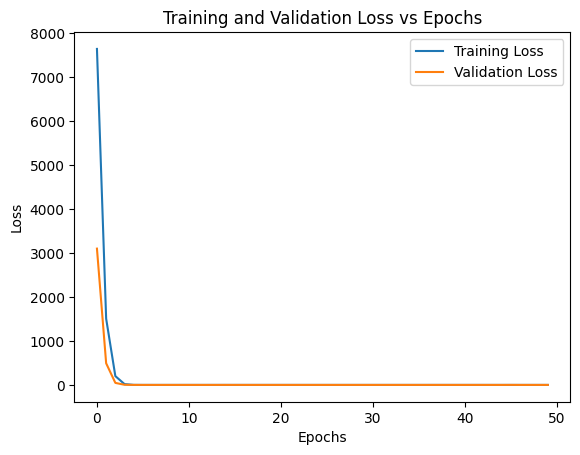

3513/3513 [==============================] - 7s 2ms/step
        userid   latitude  longitude   spotid     cluster
73027    52647  40.726995 -74.037948  1530903   41.986191
60358   114636  40.745147 -73.994730   185905   20.019295
12232    49383  40.774578 -73.872006    12505   59.997242
108360   53706  40.708669 -74.011350   286375   74.022041
73145    58967  40.763032 -73.979009   784914  135.977463
...        ...        ...        ...      ...         ...
10126    82317  40.691247 -74.179516    24963    5.991081
100039   39401  40.755929 -73.970955   535093   28.023315
15534   143566  40.770426 -73.990460    49675   14.995993
1412     86284  40.643885 -73.782806    23261    9.003657
108000   49964  40.618790 -74.246316   129386  208.790314

[100 rows x 5 columns]
 55/527 [==>...........................] - ETA: 0s

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


527/527 [==============================] - 1s 2ms/step
F1 Score: 0.9845204521638474
Accuracy: 0.9845779702236195
Precision: 0.9844663175193561
Recall: 0.9845779702236195


In [35]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming nyc_events is your DataFrame with 'longitude' and 'latitude' columns

# Rule of thumb for k: sqrt(n/2); here n is 112390 - total no. of NYC events
k_value = 240

# K-means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++')
X_sample = nyc_events[['longitude', 'latitude']]
kmeans.fit(X_sample)
y = kmeans.labels_

# Print silhouette score
silhouette = silhouette_score(X_sample, y, metric='euclidean')
print(f"k = {k_value}, silhouette_score: {silhouette}")

# Use cluster assignments as input features for LSTM
X_lstm = np.column_stack((X_sample, y))  # Adding cluster assignments as a new feature

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_lstm, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape X_train, X_val, and X_test for LSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Record the start time
start_time = time.time()



# Train LSTM model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Train LSTM model
#model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))
# Predict using the trained model
X_predict_lstm = np.column_stack((nyc_events[['longitude', 'latitude']], y))
X_predict_lstm_reshaped = X_predict_lstm.reshape((X_predict_lstm.shape[0], X_predict_lstm.shape[1], 1))
nyc_events['cluster'] = model.predict(X_predict_lstm_reshaped)

# Display a sample of the dataframe
print(nyc_events[['userid', 'latitude', 'longitude', 'spotid', 'cluster']].sample(100))


# Evaluate metrics
f1 = f1_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
accuracy = accuracy_score(y_test, np.round(model.predict(X_test_reshaped)))
precision = precision_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')
recall = recall_score(y_test, np.round(model.predict(X_test_reshaped)), average='weighted')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



527/527 [==============================] - 1s 2ms/step - loss: 0.0289
Test Loss: 0.02890169434249401


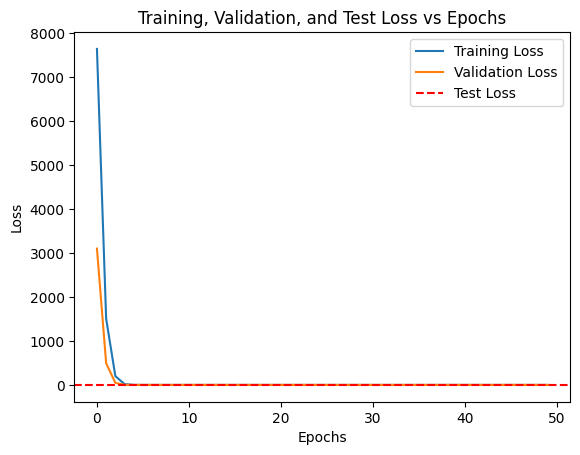

In [36]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_reshaped, y_test)

# Print the test loss
print(f'Test Loss: {test_loss}')

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Plot the test loss as a horizontal line
plt.title('Training, Validation, and Test Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
gdf = nyc_events.groupby(['cluster', 'spotid']).size().reset_index()
gdf.columns = ['cluster', 'spotid', 'count']
idx = gdf.groupby(['cluster'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]

In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def recommend_venues_lstm(df, longitude, latitude, lstm_model, kmeans_model, tolerance=1e-5):
    # Predict cluster using k-means model
    predicted_cluster = kmeans_model.predict(np.array([[longitude, latitude]]))[0]
    # Use the LSTM model to predict the cluster

    # Use the LSTM model to predict the cluster
    lstm_input = np.array([[longitude, latitude, predicted_cluster]])
    lstm_input = lstm_input.reshape((lstm_input.shape[0], lstm_input.shape[1], 1))  # Assuming LSTM input shape is (samples, timesteps, features)

    # Predicted cluster using the LSTM model
    predicted_cluster_lstm = lstm_model.predict(lstm_input)[0, 0]

    # Debugging information
    print(f"Predicted cluster (k-means): {predicted_cluster}")
    print(f"Predicted cluster (LSTM): {predicted_cluster_lstm}")
    print(f"Cluster labels in DataFrame: {df['cluster'].unique()}")

    # Ensure the predicted cluster is within the range of cluster labels in the DataFrame
    close_match = np.isclose(predicted_cluster_lstm, df['cluster'], rtol=tolerance)
    if not close_match.any():
        return 'Predicted cluster not found in the DataFrame.'

    # Filter the DataFrame for the predicted cluster
    filtered_df = df[close_match]

    # Check if there are records in the filtered DataFrame
    if not filtered_df.empty:
        # Fetch the venue name of the topmost record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['spotname']
        # Construct the recommendation message
        msg = 'What about visiting the ' + venue_name + '?'
    else:
        msg = 'No venue recommendation available for the predicted cluster.'

    return msg


In [39]:
# Example usage
recommendation_lstm = recommend_venues_lstm(topvenues_df,-72.975620, 41.680840, model, kmeans)
print(recommendation_lstm)

1/1 [==============================] - 0s 24ms/step
Predicted cluster (k-means): 35
Predicted cluster (LSTM): 34.90339279174805
Cluster labels in DataFrame: [ 59.997242    9.003657    5.9910808 ...  74.02212   172.30957
 239.21764  ]
Predicted cluster not found in the DataFrame.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#bert model

In [42]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Input, Concatenate, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from concurrent.futures import ThreadPoolExecutor
import seaborn as sns
import warnings


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming nyc_events is your DataFrame with 'longitude' and 'latitude' columns
# Assuming you have a 'userid' column in your DataFrame

# Rule of thumb for k: sqrt(n/2); here n is 112390 - total no. of NYC events
k_value = 50  # Reduced the number of clusters

# K-means clustering on longitude and latitude
X_sample = nyc_events[['longitude', 'latitude']]

# Fit KMeans on the full dataset
kmeans = KMeans(n_clusters=k_value, init='k-means++')
y_full = kmeans.fit_predict(X_sample)

# Print silhouette score for the full dataset
silhouette_full = silhouette_score(X_sample, y_full, metric='euclidean')
print(f"k = {k_value}, silhouette_score for full dataset: {silhouette_full}")

# Take a random subset for silhouette score calculation
subset_size = min(5000, len(X_sample))  # Adjust the subset size based on your data size
subset_indices = np.random.choice(len(X_sample), size=subset_size, replace=False)
X_subset = X_sample.iloc[subset_indices]

# Print silhouette score for the subset
silhouette_subset = silhouette_score(X_subset, kmeans.predict(X_subset), metric='euclidean')
print(f"k = {k_value}, silhouette_score for subset: {silhouette_subset}")

# Use cluster assignments as input features for BiLSTM
X_bert_cluster = np.column_stack((X_sample, y_full))  # Adding cluster assignments as a new feature

from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_bert_cluster, y_full, test_size=0.3, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Extract cluster labels for the training, validation, and test sets
y_train_temp = X_train_temp[:, -1]
y_val = X_val[:, -1]
y_test = X_test[:, -1]


# Convert numerical values to text format for BERT embeddings
X_text = [f"Longitude: {lon}, Latitude: {lat}" for lon, lat in zip(X_sample['longitude'], X_sample['latitude'])]

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')





k = 50, silhouette_score for full dataset: 0.43689708193444926
k = 50, silhouette_score for subset: 0.42699843395526593


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [45]:
# Function to get BERT embeddings for textual data using parallel processing
def get_bert_embeddings_parallel(texts, batch_size=32, num_workers=4):
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        embeddings = list(executor.map(get_bert_embeddings_batch, [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]))
    return np.concatenate(embeddings, axis=0)


In [46]:

# Function to get BERT embeddings for a batch of texts
def get_bert_embeddings_batch(batch_texts):
    inputs = tokenizer.batch_encode_plus(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=20)
    with torch.no_grad():
        outputs = model_bert(**inputs)
    return outputs.pooler_output.detach().numpy()

In [47]:

# Get BERT embeddings for textual representations of longitude and latitude in parallel
X_bert = get_bert_embeddings_parallel(X_text)

In [48]:
# Use cluster assignments as input features along with BERT embeddings
X_bert_cluster = np.column_stack((X_bert, y_full))  # Adding cluster assignments as a new feature

In [49]:
# Split the data into training, validation, and test sets
X_bert_train, X_bert_temp, y_bert_train, y_bert_temp = train_test_split(
    X_bert_cluster, y_full, test_size=0.3, random_state=42)
X_bert_val, X_bert_test, y_bert_val, y_bert_test = train_test_split(
    X_bert_temp, y_bert_temp, test_size=0.5, random_state=42)


In [50]:
# Extract cluster labels for the training, validation, and test sets
y_bert_train = X_bert_train[:, -1]
y_bert_val = X_bert_val[:, -1]
y_bert_test = X_bert_test[:, -1]


Epoch 1/10
2459/2459 [==============================] - 19s 6ms/step - loss: 1.6770 - accuracy: 0.4560 - val_loss: 0.9817 - val_accuracy: 0.7310
Epoch 2/10
2459/2459 [==============================] - 13s 5ms/step - loss: 1.0144 - accuracy: 0.6718 - val_loss: 0.5852 - val_accuracy: 0.8694
Epoch 3/10
2459/2459 [==============================] - 13s 5ms/step - loss: 0.7990 - accuracy: 0.7394 - val_loss: 0.5406 - val_accuracy: 0.8446
Epoch 4/10
2459/2459 [==============================] - 14s 6ms/step - loss: 0.6882 - accuracy: 0.7741 - val_loss: 0.4563 - val_accuracy: 0.8424
Epoch 5/10
2459/2459 [==============================] - 13s 5ms/step - loss: 0.6132 - accuracy: 0.7981 - val_loss: 0.3889 - val_accuracy: 0.9068
Epoch 6/10
2459/2459 [==============================] - 14s 6ms/step - loss: 0.5719 - accuracy: 0.8099 - val_loss: 0.3962 - val_accuracy: 0.9205
Epoch 7/10
2459/2459 [==============================] - 13s 5ms/step - loss: 0.5315 - accuracy: 0.8220 - val_loss: 0.3413 - val_ac

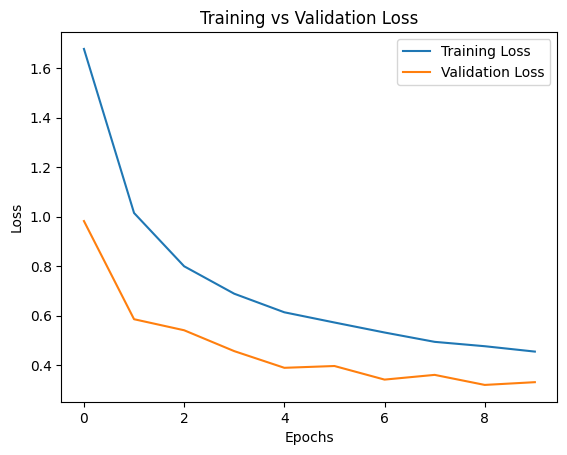

In [57]:
from keras.layers import Flatten
import time
# Assuming X_train has the shape (samples, features)
features = X_train_temp.shape[1]
timesteps = 1  # Since there are no timesteps in X_train

# Define the model architecture
input_bert = Input(shape=(X_bert_train.shape[1],))  # Assuming X_bert_train.shape[1] is the number of BERT features
input_lstm = Input(shape=(timesteps, features))  # Adjust the shape to match the LSTM features

# BERT embedding layer
bert_embedding = Dense(128, activation='relu')(input_bert)

# LSTM layer
lstm_layer = Bidirectional(LSTM(50))(input_lstm)
lstm_layer_flat = Flatten()(lstm_layer)  # Flatten the output for concatenation

# Concatenate BERT and flattened LSTM layers
concatenated = Concatenate()([bert_embedding, lstm_layer_flat])

# Additional dense layers
x = Dense(64, activation='relu')(concatenated)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layer
output_layer = Dense(k_value, activation='softmax')(x)

# Compile the model
model = Model(inputs=[input_bert, input_lstm], outputs=output_layer)
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Record the start time
start_time = time.time()

# Train the model
history = model.fit([X_bert_train, X_train_temp[:, np.newaxis, :]], y_bert_train,
                    epochs=10, batch_size=32,
                    validation_data=([X_bert_val, X_val[:, np.newaxis, :]], y_bert_val),
                    verbose=1)

# Record the end time
end_time = time.time()

# Calculate and print the training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.2f} seconds')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_bert_test, X_test[:, np.newaxis, :]], y_bert_test)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
2459/2459 [==============================] - 18s 6ms/step - loss: 1.5069 - accuracy: 0.5125 - val_loss: 0.7438 - val_accuracy: 0.7478
Epoch 2/20
2459/2459 [==============================] - 12s 5ms/step - loss: 0.8399 - accuracy: 0.7224 - val_loss: 0.4865 - val_accuracy: 0.8567
Epoch 3/20
2459/2459 [==============================] - 12s 5ms/step - loss: 0.6717 - accuracy: 0.7738 - val_loss: 0.4408 - val_accuracy: 0.8596
Epoch 4/20
2459/2459 [==============================] - 12s 5ms/step - loss: 0.5858 - accuracy: 0.7973 - val_loss: 0.3340 - val_accuracy: 0.9084
Epoch 5/20
2459/2459 [==============================] - 12s 5ms/step - loss: 0.5290 - accuracy: 0.8165 - val_loss: 0.3170 - val_accuracy: 0.8690
Epoch 6/20
2459/2459 [==============================] - 12s 5ms/step - loss: 0.4858 - accuracy: 0.8282 - val_loss: 0.3408 - val_accuracy: 0.8691
Epoch 7/20
2459/2459 [==============================] - 12s 5ms/step - loss: 0.4525 - accuracy: 0.8392 - val_loss: 0.3029 - val_ac

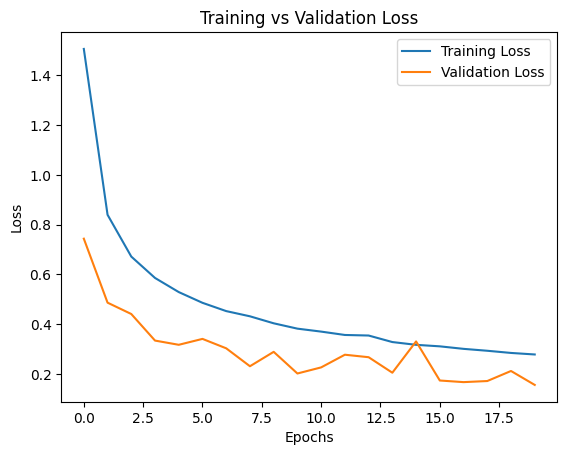

In [63]:
from keras.layers import Flatten
import time
# Assuming X_train has the shape (samples, features)
features = X_train_temp.shape[1]
timesteps = 1  # Since there are no timesteps in X_train

# Define the model architecture
input_bert = Input(shape=(X_bert_train.shape[1],))  # Assuming X_bert_train.shape[1] is the number of BERT features
input_lstm = Input(shape=(timesteps, features))  # Adjust the shape to match the LSTM features

# BERT embedding layer
bert_embedding = Dense(128, activation='relu')(input_bert)

# LSTM layer
lstm_layer = Bidirectional(LSTM(50))(input_lstm)
lstm_layer_flat = Flatten()(lstm_layer)  # Flatten the output for concatenation

# Concatenate BERT and flattened LSTM layers
concatenated = Concatenate()([bert_embedding, lstm_layer_flat])

# Additional dense layers
x = Dense(64, activation='relu')(concatenated)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layer
output_layer = Dense(k_value, activation='softmax')(x)

# Compile the model
model = Model(inputs=[input_bert, input_lstm], outputs=output_layer)
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Record the start time
start_time = time.time()

# Train the model
history = model.fit([X_bert_train, X_train_temp[:, np.newaxis, :]], y_bert_train,
                    epochs=20, batch_size=32,
                    validation_data=([X_bert_val, X_val[:, np.newaxis, :]], y_bert_val),
                    verbose=1)

# Record the end time
end_time = time.time()

# Calculate and print the training time
training_time = end_time - start_time
print(f'Training Time: {training_time:.2f} seconds')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_bert_test, X_test[:, np.newaxis, :]], y_bert_test)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [64]:
# Assuming X_test has the shape (samples, features)
timesteps_predict = 3  # Adjust this to match the timesteps used during training

# Reshape X_test to match the expected input shape
X_test_reshaped = X_test[:, np.newaxis, :timesteps_predict]

# Predict using the trained model on test data
y_bert_test_pred = model.predict([X_bert_test, X_test_reshaped])
y_bert_test_pred_classes = np.argmax(y_bert_test_pred, axis=1)

527/527 [==============================] - 3s 2ms/step


In [68]:
# Assuming X_test has the shape (samples, features)
timesteps_predict = 3  # Adjust this to match the timesteps used during training

# Reshape X_test to match the expected input shape
X_test_reshaped = X_test[:, np.newaxis, :timesteps_predict]

# Predict using the trained model on test data
y_bert_test_pred = model.predict([X_bert_test, X_test_reshaped])
y_bert_test_pred_classes = np.argmax(y_bert_test_pred, axis=1)

# Update cluster assignments for the subset of the dataset
nyc_events.loc[:16858, 'cluster_bert'] = y_bert_test_pred_classes




527/527 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
from keras.layers import Input, Dense, Bidirectional, LSTM, Concatenate, Dropout, Flatten
from keras.models import Model
from transformers import BertTokenizer, BertModel
import torch

def recommend_place_bert_lstm(latitude, longitude, model, tokenizer, topvenues_df, max_length=20):
    # Create a textual representation for latitude and longitude
    input_text = f"Longitude: {longitude}, Latitude: {latitude}"

    # Get BERT embeddings for the input text
    input_embedding = get_bert_embeddings_batch([input_text], tokenizer, model, max_length)

    # Extract the output of the last BERT layer
    bert_last_layer_output = model.layers[3].output  # Assuming index 3 is the BERT layer

    # Flatten the output of the last BERT layer
    bert_last_layer_flat = Flatten()(bert_last_layer_output)

    # Extract the output of the LSTM layer
    lstm_output = model.layers[4].output  # Assuming index 4 is the LSTM layer
    lstm_layer_flat = Flatten()(lstm_output)

    # Concatenate BERT and LSTM layers
    concatenated = Concatenate()([bert_last_layer_flat, lstm_layer_flat])

    # Additional dense layers
    x = Dense(64, activation='relu')(concatenated)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)

    # Output layer
    output_layer = Dense(k_value, activation='softmax')(x)

    # Compile the sub-model
    sub_model = Model(inputs=[model.input[0], model.input[1]], outputs=output_layer)
    sub_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Predict the cluster using the sub-model
    predicted_cluster = np.argmax(sub_model.predict([input_text, np.array([[longitude, latitude]])]))

    # Use the predicted cluster to recommend a place
    recommended_place = get_recommendation_from_cluster(topvenues_df, predicted_cluster)

    return recommended_place

# Example usage
latitude_input = 40.734234
longitude_input = -74.164517

# Example usage of the recommendation function
recommendation_bert_lstm = recommend_place_bert_lstm(latitude_input, longitude_input, model, tokenizer, topvenues_df)
print(recommendation_bert_lstm)


In [54]:
gdf = nyc_events.groupby(['cluster_bert', 'spotid']).size().reset_index()
gdf.columns = ['cluster_bert', 'spotid', 'count']
idx = gdf.groupby(['cluster_bert'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]

In [41]:
# Assuming the BERT model is defined with 2 input layers (bert_input and coord_input)
def recommend_new_place(latitude, longitude, topvenues_df, model, tokenizer):
    # Create a new text based on longitude and latitude
    new_text = f"Longitude: {longitude}, Latitude: {latitude}"
    
    # Get BERT embeddings for the new text
    new_text_embedding = get_bert_embeddings_parallel([new_text])
    
    # Predict cluster label using the trained Keras model
    predicted_cluster = model.predict([new_text_embedding, np.array([[longitude, latitude]])[:, np.newaxis, :]])
    
    # Filter top venues DataFrame for the predicted cluster
    filtered_df = topvenues_df[topvenues_df['cluster_bert'] == predicted_cluster[0]]

    if not filtered_df.empty:
        # Fetch the venue name of the top record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['venue_name']
        recommendation = f"What about visiting the {venue_name}?"
    else:
        recommendation = 'No venue recommendation available for the predicted cluster.'

    return recommendation



In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

def recommend_venues_bert(df, longitude, latitude, bert_model, kmeans_model, tolerance=1e-5):
    # Predict cluster using k-means model
    predicted_cluster = kmeans_model.predict(np.array([[longitude, latitude]]))[0]

    
    bilstm_input = np.array([[longitude, latitude, predicted_cluster]])
    bilstm_input = bilstm_input.reshape((bilstm_input.shape[0], 1, bilstm_input.shape[1]))

    predicted_cluster_bilstm = bert_model.predict(bilstm_input)[0, 0]

    # Debugging information
    print(f"Predicted cluster (k-means): {predicted_cluster}")
    print(f"Predicted cluster (BERT): {predicted_cluster_bilstm}")
    print(f"Cluster labels in DataFrame: {df['cluster'].unique()}")

    # Ensure the predicted cluster is within the range of cluster labels in the DataFrame
    close_match = np.isclose(predicted_cluster_bilstm, df['cluster'], rtol=tolerance)
    if not close_match.any():
        return 'Predicted cluster not found in the DataFrame.'

    # Filter the DataFrame for the predicted cluster
    filtered_df = df[close_match]

    # Check if there are records in the filtered DataFrame
    if not filtered_df.empty:
        # Fetch the venue name of the topmost record in the DataFrame for the predicted cluster
        venue_name = filtered_df.iloc[0]['spotname']
        # Construct the recommendation message
        msg = 'What about visiting the ' + venue_name + '?'
    else:
        msg = 'No venue recommendation available for the predicted cluster.'

    return msg


In [14]:
recommend_venues_bert(topvenues_df,-73.989163 ,40.730189 ,model,kmeans)

1/1 [==============================] - 0s 21ms/step
Predicted cluster (k-means): 200
Predicted cluster (BERT): 200.2438201904297
Cluster labels in DataFrame: [3.9195714e+00 1.2794673e+02 1.9819073e+02 ... 7.6765198e+01 7.7974922e+01
 2.2945404e-03]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


'What about visiting the Webster Hall?'

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9163313830339685
Recall: 0.9402692923660952
F1 Score: 0.9256333566703162
Accuracy:0.9402692923660952


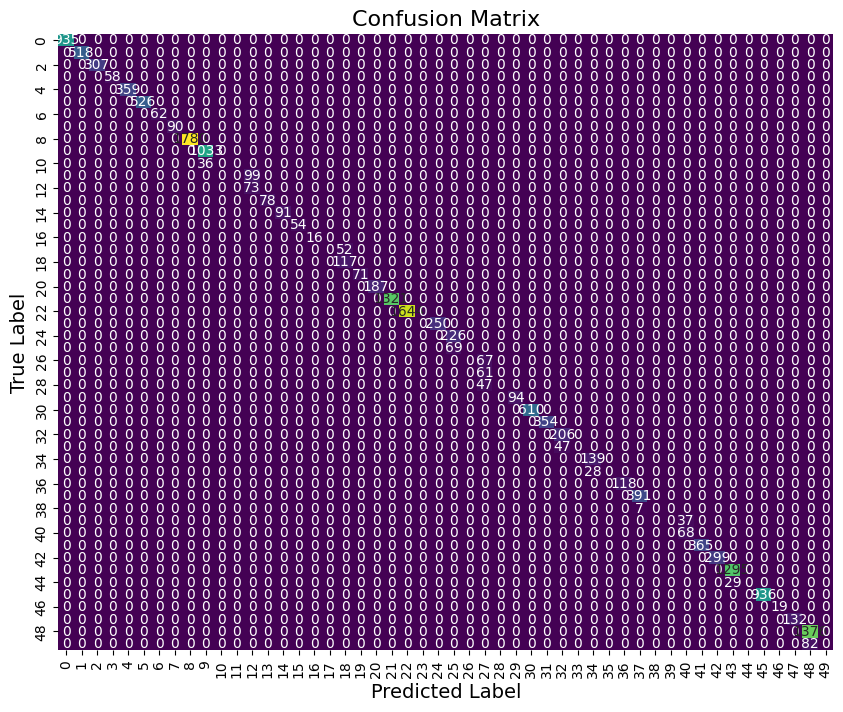

In [69]:
from sklearn.metrics import silhouette_score, precision_score, recall_score, f1_score,accuracy_score
# Quantitative evaluation metrics
precision = precision_score(y_bert_test, y_bert_test_pred_classes, average='weighted')
recall = recall_score(y_bert_test, y_bert_test_pred_classes, average='weighted')
f1 = f1_score(y_bert_test, y_bert_test_pred_classes, average='weighted')
accuracy = accuracy_score(y_bert_test, y_bert_test_pred_classes)


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy:{accuracy}")
# Confusion Matrix
cm = confusion_matrix(y_bert_test, y_bert_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()
